## Imports

In [2]:
import pandas as pd
from google.cloud import storage
import os

## Load JSON

In [8]:
path = '../Data/json_metadata/'
json_files = [path+file for file in os.listdir(path)]

In [9]:
json_files

['../Data/json_metadata/metadata01.json',
 '../Data/json_metadata/metadata.json',
 '../Data/json_metadata/metadata32.json',
 '../Data/json_metadata/metadata42.json',
 '../Data/json_metadata/metadata24.json',
 '../Data/json_metadata/metadata44.json',
 '../Data/json_metadata/metadata2.json',
 '../Data/json_metadata/metadata9.json',
 '../Data/json_metadata/metadata21.json',
 '../Data/json_metadata/metadata35.json',
 '../Data/json_metadata/metadata30.json',
 '../Data/json_metadata/metadata34.json',
 '../Data/json_metadata/metadata48.json',
 '../Data/json_metadata/metadata13.json',
 '../Data/json_metadata/metadata8.json',
 '../Data/json_metadata/metadata37.json',
 '../Data/json_metadata/metadata4.json',
 '../Data/json_metadata/metadata11.json',
 '../Data/json_metadata/metadata19.json',
 '../Data/json_metadata/metadata31.json',
 '../Data/json_metadata/metadata41.json',
 '../Data/json_metadata/metadata6.json',
 '../Data/json_metadata/metadata17.json',
 '../Data/json_metadata/metadata36.json',

In [10]:
json_metadata = pd.concat([pd.read_json(json_file, orient = 'index') for json_file in json_files])

In [11]:
json_metadata = json_metadata.reset_index()

In [12]:
json_metadata = json_metadata.rename(columns={'index': 'videoname'})

## Explo

In [13]:
full_df = json_metadata

In [14]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119154 entries, 0 to 119153
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   videoname  119154 non-null  object
 1   label      119154 non-null  object
 2   split      119154 non-null  object
 3   original   100000 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB


Il y a 116020  Vidéos en tout

In [15]:
len(full_df)

119154

On a ~97K vidéo fakes et ~18k vidéos réelles

In [16]:
full_df.groupby('label').count()['videoname']

label
FAKE    100000
REAL     19154
Name: videoname, dtype: int64

Je crée 2 DF, un pour les réelles, un pour les fakes

In [17]:
fakes_df = full_df[full_df['label'] == 'FAKE']

In [18]:
real_df = full_df[full_df['label'] == 'REAL']

On a 18639 Vidéos "Réelles" :

In [19]:
len(real_df)

19154

Il n'y a pas de doublons parmis les labels des vidéos Originales : 

In [20]:
len(real_df['videoname'].drop_duplicates()) == len(real_df['videoname'])

True

Ni parmis les Fakes

In [21]:
len(fakes_df['videoname'].drop_duplicates()) == len(fakes_df['videoname'])

True

Certaines vidéos 'réelles' ont permis la génération de plusieurs dizaines de fakes. La majorité n'en ont généré qu'1 ou 2

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

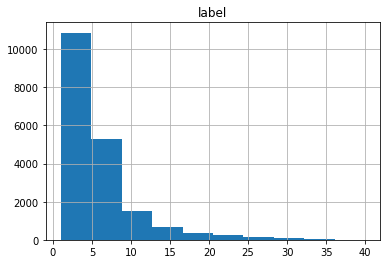

In [22]:
fakes_df.groupby('original').count()[['label']].hist()

Je génère une liste de vidéo deepfake avec une seule vidéo 'originale' : Dedup_fake_df_id
Le problème, on se rend compte que certaines vidéos "fakes" n'ont pas d'équivalent en "réelle"

In [23]:
dedup_fakes_df_id= fakes_df.sample(frac = 1, random_state=42)[['original']].drop_duplicates()
dedup_fakes_df_id

,original
90154,ugusefbydg.mp4
95501,veujgyyigk.mp4
23519,bxrqolkezc.mp4
91292,tvdlpqwnzl.mp4
110758,hzwegdkpck.mp4
...,...
84625,cikgroaccw.mp4
54093,oaauoagcrb.mp4
22904,glzwsxpwuh.mp4
104029,uxbeupxqqr.mp4


En effet, on a ~18639  vidéos qui ont servi de base aux vidéos 'fake', soit 700 de plus que les vidéos "réelles"

In [24]:
print(f'On a {len(real_df)} vidéos REAL')
print(f'On a {len(dedup_fakes_df_id)} vidéos FAKE')

On a 19154 vidéos REAL
On a 19154 vidéos FAKE


In [25]:
dedup_fakes_df = fakes_df.merge(dedup_fakes_df_id, how = 'inner', left_index=True, right_index=True).drop(columns = 'original_y').rename(columns= {'original_x': 'original'})
dedup_fakes_df

,videoname,label,split,original
25,ujslmfluwe.mp4,FAKE,train,oznyyhvzxk.mp4
92,httbasaevn.mp4,FAKE,train,bvpeerislp.mp4
104,bmsoarcvmn.mp4,FAKE,train,yhylappzid.mp4
113,vwdveepjhm.mp4,FAKE,train,kwfdyqofzw.mp4
114,jyrvsifszr.mp4,FAKE,train,blszgmxkvu.mp4
...,...,...,...,...
119143,pehfopbcsu.mp4,FAKE,train,vyecastqxh.mp4
119144,dzffetljax.mp4,FAKE,train,qybjkjeiyd.mp4
119145,gepynjpkym.mp4,FAKE,train,nusbqbtqvi.mp4
119147,dnwpesywuh.mp4,FAKE,train,wswnlvujup.mp4


Au total, 18639 vidéos "réelles" ont servi de base à la création de deepfake

In [26]:
dedup_fakes_df['fake'] = dedup_fakes_df['videoname']
dedup_fakes_df['real'] = dedup_fakes_df['original']

In [27]:
dedup_fakes_df

,videoname,label,split,original,fake,real
25,ujslmfluwe.mp4,FAKE,train,oznyyhvzxk.mp4,ujslmfluwe.mp4,oznyyhvzxk.mp4
92,httbasaevn.mp4,FAKE,train,bvpeerislp.mp4,httbasaevn.mp4,bvpeerislp.mp4
104,bmsoarcvmn.mp4,FAKE,train,yhylappzid.mp4,bmsoarcvmn.mp4,yhylappzid.mp4
113,vwdveepjhm.mp4,FAKE,train,kwfdyqofzw.mp4,vwdveepjhm.mp4,kwfdyqofzw.mp4
114,jyrvsifszr.mp4,FAKE,train,blszgmxkvu.mp4,jyrvsifszr.mp4,blszgmxkvu.mp4
...,...,...,...,...,...,...
119143,pehfopbcsu.mp4,FAKE,train,vyecastqxh.mp4,pehfopbcsu.mp4,vyecastqxh.mp4
119144,dzffetljax.mp4,FAKE,train,qybjkjeiyd.mp4,dzffetljax.mp4,qybjkjeiyd.mp4
119145,gepynjpkym.mp4,FAKE,train,nusbqbtqvi.mp4,gepynjpkym.mp4,nusbqbtqvi.mp4
119147,dnwpesywuh.mp4,FAKE,train,wswnlvujup.mp4,dnwpesywuh.mp4,wswnlvujup.mp4


In [28]:
fake_and_real_df = dedup_fakes_df[['fake', 'real']].merge(real_df.drop(columns = 'original'), left_on='real', right_on = 'videoname')[['fake', 'real']]
fake_and_real_df

,fake,real
0,ujslmfluwe.mp4,oznyyhvzxk.mp4
1,httbasaevn.mp4,bvpeerislp.mp4
2,bmsoarcvmn.mp4,yhylappzid.mp4
3,vwdveepjhm.mp4,kwfdyqofzw.mp4
4,jyrvsifszr.mp4,blszgmxkvu.mp4
...,...,...
19149,pehfopbcsu.mp4,vyecastqxh.mp4
19150,dzffetljax.mp4,qybjkjeiyd.mp4
19151,gepynjpkym.mp4,nusbqbtqvi.mp4
19152,dnwpesywuh.mp4,wswnlvujup.mp4


In [29]:
print(f'On a {len(fake_and_real_df)} vidéos REAL qui ont permis de faire au-moins un deepfake')

On a 19154 vidéos REAL qui ont permis de faire au-moins un deepfake


In [30]:
list_of_videos_to_select = fake_and_real_df.melt()
list_of_videos_to_select = list_of_videos_to_select.rename(columns={'variable' : 'fake or real', 'value' : 'video_id'})
list_of_videos_to_select

,fake or real,video_id
0,fake,ujslmfluwe.mp4
1,fake,httbasaevn.mp4
2,fake,bmsoarcvmn.mp4
3,fake,vwdveepjhm.mp4
4,fake,jyrvsifszr.mp4
...,...,...
38303,real,vyecastqxh.mp4
38304,real,qybjkjeiyd.mp4
38305,real,nusbqbtqvi.mp4
38306,real,wswnlvujup.mp4


In [31]:
print(f'On a {len(list_of_videos_to_select)} vidéos en tout')

On a 38308 vidéos en tout


In [32]:
list_of_videos_to_select.to_csv('list_of_videos_to_select.csv', index=False)

## Je checke mon boulot

In [33]:
check_df = pd.read_csv('list_of_videos_to_select.csv')

In [34]:
check_df.head()

,fake or real,video_id
0,fake,ujslmfluwe.mp4
1,fake,httbasaevn.mp4
2,fake,bmsoarcvmn.mp4
3,fake,vwdveepjhm.mp4
4,fake,jyrvsifszr.mp4


On a bien autant de fake que de real

In [35]:
check_df.groupby('fake or real').count()

,video_id
fake or real,
fake,19154
real,19154


Pour cette partie, je crée un df pour m'assurer que les vidéos marquées comme 'real' dans les csv sont bien 'real'
je l'appelle check_real_df

In [36]:
check_real_df = check_df[check_df['fake or real'] == 'real']
check_real_df                         

,fake or real,video_id
19154,real,oznyyhvzxk.mp4
19155,real,bvpeerislp.mp4
19156,real,yhylappzid.mp4
19157,real,kwfdyqofzw.mp4
19158,real,blszgmxkvu.mp4
...,...,...
38303,real,vyecastqxh.mp4
38304,real,qybjkjeiyd.mp4
38305,real,nusbqbtqvi.mp4
38306,real,wswnlvujup.mp4


je le fusionne avec le df de base

In [37]:
check_real_df = check_real_df.merge(full_df, left_on='video_id', right_on='videoname')
check_real_df

,fake or real,video_id,videoname,label,split,original
0,real,oznyyhvzxk.mp4,oznyyhvzxk.mp4,REAL,train,NaN
1,real,bvpeerislp.mp4,bvpeerislp.mp4,REAL,train,NaN
2,real,yhylappzid.mp4,yhylappzid.mp4,REAL,train,NaN
3,real,kwfdyqofzw.mp4,kwfdyqofzw.mp4,REAL,train,NaN
4,real,blszgmxkvu.mp4,blszgmxkvu.mp4,REAL,train,NaN
...,...,...,...,...,...,...
19149,real,vyecastqxh.mp4,vyecastqxh.mp4,REAL,train,NaN
19150,real,qybjkjeiyd.mp4,qybjkjeiyd.mp4,REAL,train,NaN
19151,real,nusbqbtqvi.mp4,nusbqbtqvi.mp4,REAL,train,NaN
19152,real,wswnlvujup.mp4,wswnlvujup.mp4,REAL,train,NaN


 je filtre sur la colonne label et je m'assure qu'il n'y a que des 'REAL'

In [38]:
len(check_real_df) == len(check_real_df[check_real_df['label'] == 'REAL'])

True

Je fais la même chose avec les fake

In [39]:
check_fake_df = check_df[check_df['fake or real'] == 'fake']
check_fake_df

,fake or real,video_id
0,fake,ujslmfluwe.mp4
1,fake,httbasaevn.mp4
2,fake,bmsoarcvmn.mp4
3,fake,vwdveepjhm.mp4
4,fake,jyrvsifszr.mp4
...,...,...
19149,fake,pehfopbcsu.mp4
19150,fake,dzffetljax.mp4
19151,fake,gepynjpkym.mp4
19152,fake,dnwpesywuh.mp4


In [40]:
check_fake_df = check_fake_df.merge(full_df, left_on='video_id', right_on='videoname')
check_fake_df

,fake or real,video_id,videoname,label,split,original
0,fake,ujslmfluwe.mp4,ujslmfluwe.mp4,FAKE,train,oznyyhvzxk.mp4
1,fake,httbasaevn.mp4,httbasaevn.mp4,FAKE,train,bvpeerislp.mp4
2,fake,bmsoarcvmn.mp4,bmsoarcvmn.mp4,FAKE,train,yhylappzid.mp4
3,fake,vwdveepjhm.mp4,vwdveepjhm.mp4,FAKE,train,kwfdyqofzw.mp4
4,fake,jyrvsifszr.mp4,jyrvsifszr.mp4,FAKE,train,blszgmxkvu.mp4
...,...,...,...,...,...,...
19149,fake,pehfopbcsu.mp4,pehfopbcsu.mp4,FAKE,train,vyecastqxh.mp4
19150,fake,dzffetljax.mp4,dzffetljax.mp4,FAKE,train,qybjkjeiyd.mp4
19151,fake,gepynjpkym.mp4,gepynjpkym.mp4,FAKE,train,nusbqbtqvi.mp4
19152,fake,dnwpesywuh.mp4,dnwpesywuh.mp4,FAKE,train,wswnlvujup.mp4


In [41]:
len(check_fake_df) == len(check_fake_df[check_fake_df['label'] == 'FAKE'])

True

Pour les fakes, je m'assure également qu'il n'y a pas de doublons parmi les 'original'

In [42]:
len(check_fake_df[['original']].drop_duplicates()) == len(check_fake_df)

True

## J'importe la liste des blobs dans les bucket et je check les CSV

In [43]:
def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    # bucket_name = "your-bucket-name"
    storage_client = storage.Client().from_service_account_json('../01/kfc_bucket.json')
    blobs = storage_client.list_blobs(bucket_name)

    # List of videos in the bucket
    list_blobs = [blob.name for blob in blobs]
    list_videos = [blob.rsplit("/")[-1] for blob in list_blobs]
    
    return list_blobs, list_videos

In [44]:
bucket = 'bachata-kfc-bucket'

list_blobs, list_videos = list_blobs(bucket)

list_of_videos_on_bucket = pd.DataFrame(zip(list_blobs, list_videos), columns=['glob', 'video_id'])
list_of_videos_on_bucket

,glob,video_id
0,Full_dataset/,
1,Full_dataset/aaagqkcdis.mp4,aaagqkcdis.mp4
2,Full_dataset/aaaoqepxnf.mp4,aaaoqepxnf.mp4
3,Full_dataset/aaapwqhxli.mp4,aaapwqhxli.mp4
4,Full_dataset/aaavbjopeq.mp4,aaavbjopeq.mp4
...,...,...
119199,test/aassnaulhq.mp4,aassnaulhq.mp4
119200,test/aktnlyqpah.mp4,aktnlyqpah.mp4
119201,test/alrtntfxtd.mp4,alrtntfxtd.mp4
119202,test/file.mp4,file.mp4


### J'importe la liste des vidéos à sélectionner

In [45]:
list_of_videos_to_select = pd.read_csv('list_of_videos_to_select.csv')
list_of_videos_to_select

,fake or real,video_id
0,fake,ujslmfluwe.mp4
1,fake,httbasaevn.mp4
2,fake,bmsoarcvmn.mp4
3,fake,vwdveepjhm.mp4
4,fake,jyrvsifszr.mp4
...,...,...
38303,real,vyecastqxh.mp4
38304,real,qybjkjeiyd.mp4
38305,real,nusbqbtqvi.mp4
38306,real,wswnlvujup.mp4


In [46]:
bucket_video_folder = 'Full_dataset/'

In [47]:
list_of_videos_to_select['glob'] = bucket_video_folder + list_of_videos_to_select['video_id']

In [48]:
list_of_videos_to_select.head()

,fake or real,video_id,glob
0,fake,ujslmfluwe.mp4,Full_dataset/ujslmfluwe.mp4
1,fake,httbasaevn.mp4,Full_dataset/httbasaevn.mp4
2,fake,bmsoarcvmn.mp4,Full_dataset/bmsoarcvmn.mp4
3,fake,vwdveepjhm.mp4,Full_dataset/vwdveepjhm.mp4
4,fake,jyrvsifszr.mp4,Full_dataset/jyrvsifszr.mp4


### je check que les vidéos du csv sont bien TOUTES dans le bucket. Sinon c'est la merdasse

In [49]:
list_of_common_videos_in_csv_and_bucket = list_of_videos_to_select.merge(list_of_videos_on_bucket, on= 'video_id', how = 'inner')

In [50]:
len(list_of_common_videos_in_csv_and_bucket)

38308

In [51]:
len(list_of_videos_to_select)

38308